In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
test = pd.read_pickle("X_test.pkl")
X = pd.read_pickle("X_train.pkl")
Y = pd.read_pickle("Y_train.pkl")

In [3]:
#Import Train Test Split
from sklearn.model_selection import train_test_split

#Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [4]:
#Import Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
#Import Roc Curve  
from sklearn.metrics import roc_curve, auc
#import XGBClassifier, RandomForestClassifier, KnearsNeighborsClassifier, logisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression


c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [5]:

#Function for plotting ROC_AUC curve
def plot_roc_curve(Y_test, preds):
    fpr, tpr, thresholds = roc_curve(Y_test, preds)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metric

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      4719
         1.0       0.00      0.00      0.00        39

    accuracy                           0.99      4758
   macro avg       0.50      0.50      0.50      4758
weighted avg       0.98      0.99      0.99      4758

[[4719    0]
 [  39    0]]


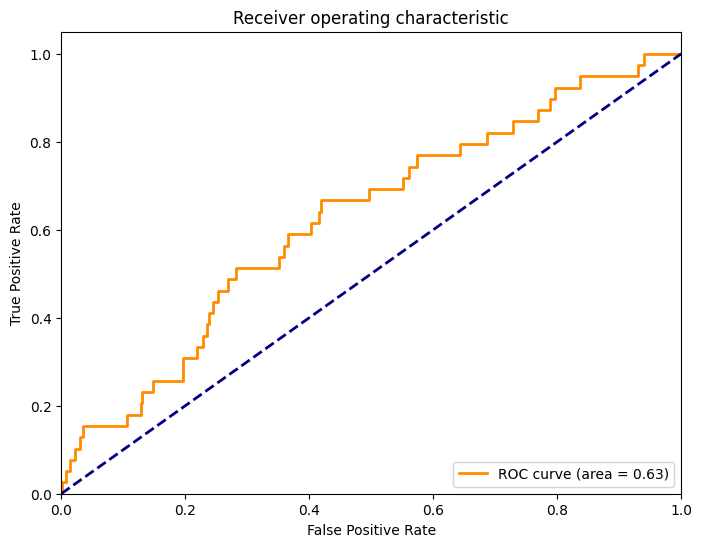

In [6]:
#Create Logistic Regression Model for Fraud Detection
log_reg = LogisticRegression(C=1e5, solver='lbfgs', max_iter=100)
log_reg.fit(X_train, Y_train)
preds = log_reg.predict(X_test)
preds_proba = log_reg.predict_proba(X_test)[:, 1]

#Print Classification Report
print(classification_report(Y_test, preds))
#Print Confusion Matrix
print(confusion_matrix(Y_test, preds))
#Plot ROC_AUC Curve
plot_roc_curve(Y_test, preds_proba)

In [7]:
#Import Isolation Forest
from sklearn.ensemble import IsolationForest
#Import Local Outlier Factor
from sklearn.neighbors import LocalOutlierFactor

Isolation Forest: 213642
Accuracy Score :
0.9905422446406053
Classification Report :
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      4719
         1.0       0.00      0.00      0.00        39

    accuracy                           0.99      4758
   macro avg       0.50      0.50      0.50      4758
weighted avg       0.98      0.99      0.99      4758



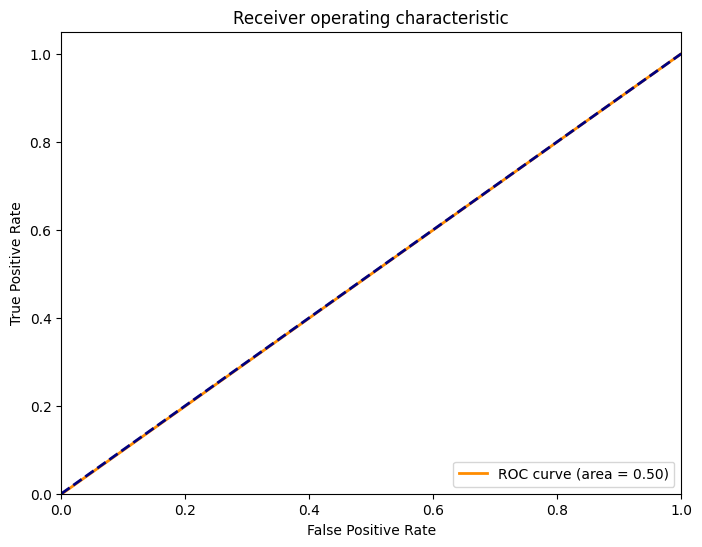

In [8]:
#Create Isolation Forest Model for Fraud Detection
iso_forest = IsolationForest(n_estimators=100, max_samples='auto', contamination=float(0.001), max_features=1.0)
iso_forest.fit(X_train)
preds = iso_forest.predict(X_test)
preds[preds == 1] = 0
preds[preds == -1] = 1
#Reshape T_Test to 1D Array
Y_test_r = Y_test.to_numpy()


n_errors = (preds != Y_test_r).sum()
print('{}: {}'.format('Isolation Forest', n_errors))
print("Accuracy Score :")
print(accuracy_score(Y_test, preds))
print("Classification Report :")
print(classification_report(Y_test, preds))


#Plot ROC_AUC Curve
plot_roc_curve(Y_test, preds)


In [9]:
#Predict probablity of fraud using models
preds_proba = log_reg.predict_proba(test)[:, 1]

#Predict score samples using Isolation Forest
preds_iso = iso_forest.score_samples(test)


In [10]:
#Print Pred_iso
print(preds_iso)




[-0.55980492 -0.57648161 -0.58340515 ... -0.5681879  -0.48206099
 -0.5101735 ]


Classification report for classifier :               precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      4719
         1.0       0.00      0.00      0.00        39

    accuracy                           0.99      4758
   macro avg       0.50      0.50      0.50      4758
weighted avg       0.98      0.99      0.99      4758



c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Confusion matrix:
 [[4716    3]
 [  39    0]]


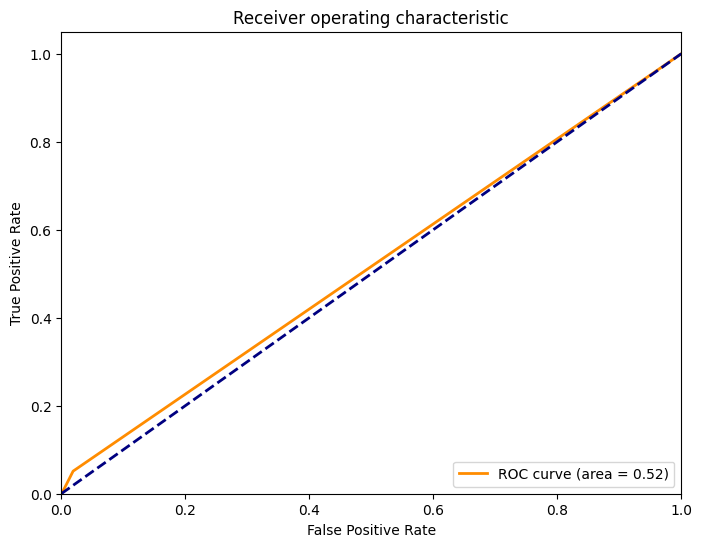

In [11]:
# Create K-Nearest Neighbors Classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)
knn_pred = knn.predict(X_test)

print("Classification report for classifier :", classification_report(Y_test, knn_pred))
print("Confusion matrix:\n" , confusion_matrix(Y_test, knn_pred))
plot_roc_curve(Y_test, knn.predict_proba(X_test)[::,1])

C:\Users\galve\AppData\Local\Temp\ipykernel_18348\2162731600.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, Y_train)


Classification report for classifier :               precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      4719
         1.0       0.20      0.03      0.05        39

    accuracy                           0.99      4758
   macro avg       0.60      0.51      0.52      4758
weighted avg       0.99      0.99      0.99      4758

Confusion matrix:
 [[4715    4]
 [  38    1]]


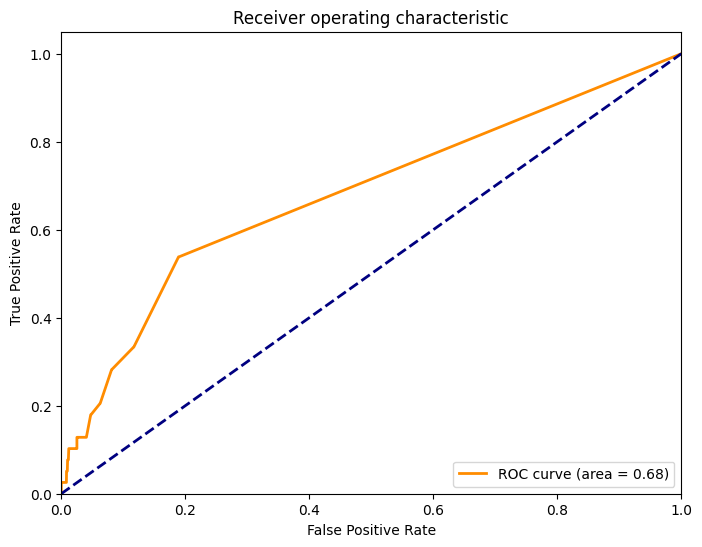

In [12]:
#Create Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, Y_train)
rfc_pred = rfc.predict(X_test)

print("Classification report for classifier :", classification_report(Y_test, rfc_pred))
print("Confusion matrix:\n" , confusion_matrix(Y_test, rfc_pred))
plot_roc_curve(Y_test, rfc.predict_proba(X_test)[::,1])


c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = 

[10:06:24] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Classification report for classifier :               precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      4719
         1.0       0.17      0.03      0.04        39

    accuracy                           0.99      4758
   macro avg       0.58      0.51      0.52      4758
weighted avg       0.99      0.99      0.99      4758

Confusion matrix:
 [[4714    5]
 [  38    1]]


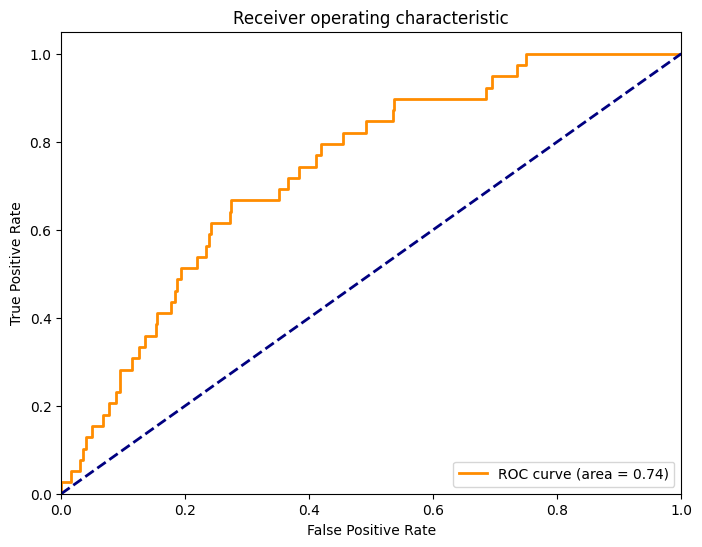

In [31]:
#Import XGBoost Classifier
from xgboost import XGBClassifier
import xgboost as xgb

#Create XGBoost Classifier
xgb = XGBClassifier()
xgb.fit(X_train, Y_train)
xgb_pred = xgb.predict(X_test)

print("Classification report for classifier :", classification_report(Y_test, xgb_pred))
print("Confusion matrix:\n" , confusion_matrix(Y_test, xgb_pred))
plot_roc_curve(Y_test, xgb.predict_proba(X_test)[::,1])




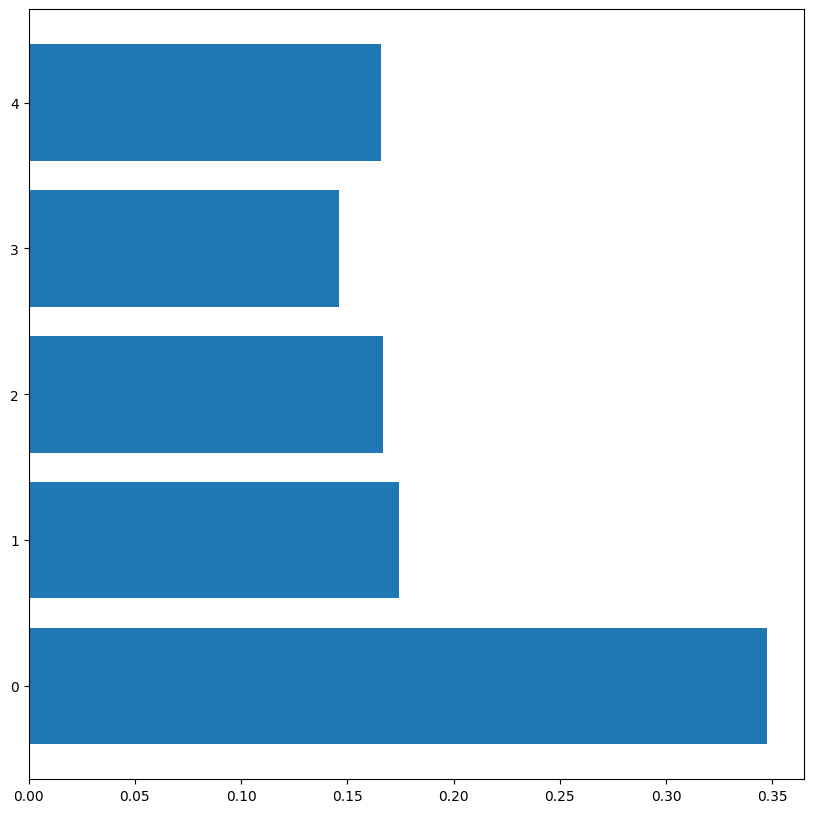

In [14]:
#Plot feature importance
plt.figure(figsize=(10, 10))
plt.barh(X.columns, xgb.feature_importances_)
plt.show()

In [32]:
#Compute sample weight using sklearn sample_weight
from sklearn.utils import class_weight
sample_weights = class_weight.compute_sample_weight('balanced', Y_train)



In [33]:
#print sample weights
print(sample_weights)

[0.50517598 0.50517598 0.50517598 ... 0.50517598 0.50517598 0.50517598]


c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = 

[10:07:02] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "sample_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:07:02] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Classification report for classifier :               precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      4719
         1.0       0.17      0.03      0.04        39

    accuracy                   

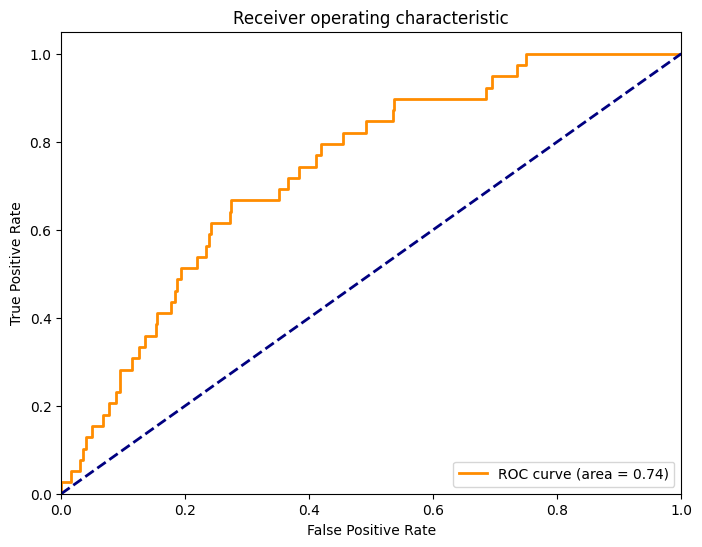

In [34]:
#Create XGBoost Classifier with sample weights
xgb = XGBClassifier(n_estimators=100, random_state=42, verbosity=1, objective='binary:logistic', sample_weight=sample_weights)

xgb.fit(X_train, Y_train)
xgb_pred = xgb.predict(X_test)

print("Classification report for classifier :", classification_report(Y_test, xgb_pred))
print("Confusion matrix:\n" , confusion_matrix(Y_test, xgb_pred))
plot_roc_curve(Y_test, xgb.predict_proba(X_test)[::,1])



In [35]:
#Test the model on test data
test_pred = xgb.predict(test)

#Put the predictions in a dataframe
test_pred = pd.DataFrame(test_pred)


In [36]:
#Print the predictions
print(test_pred)


        0
0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
...   ...
1840  0.0
1841  0.0
1842  0.0
1843  0.0
1844  0.0

[1845 rows x 1 columns]


In [37]:
#Value counts of predictions
print(test_pred[0].value_counts())

0.0    1845
Name: 0, dtype: int64


In [38]:
import optuna
#import sklearn accuracy score
from sklearn.metrics import accuracy_score

In [41]:
#Hyperparameter tuning using Optuna for XGBoost
def objective(trial):
    #Tune hyperparameters
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1.0),
        'subsample': trial.suggest_uniform('subsample', 0.2, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.2, 1.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_loguniform('gamma', 1e-3, 1.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 1.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 1.0),
        'random_state': 42,
        'verbosity': 1,
        'objective': 'binary:logistic',
        'sample_weight': sample_weights
    }
    #Create XGBoost Classifier
    xgb = XGBClassifier(**param)
    xgb.fit(X_train, Y_train)
    preds = xgb.predict(X_test)
    #Return accuracy score
    return accuracy_score(Y_test, preds)



    


In [42]:
#Create study object
study = optuna.create_study(direction='maximize')
#Optimize the objective function
study.optimize(objective, n_trials=100)


[I 2022-12-13 10:08:08,776] A new study created in memory with name: no-name-f459e7dd-6b54-46d0-a255-47853a186889
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was pas

[10:08:08] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "sample_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:08:08] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-13 10:08:12,000] Trial 0 finished with value: 0.9899117276166457 and parameters: {'n_estimators': 518, 'max_depth': 9, 'learning_rate': 0.3118313897078754, 'subsample': 0.20865556609107794, 'colsample_bytree': 0.7148343677596507, 'min_child_weight': 1, 'gamma': 0.45575685183086884, 'reg_alpha': 0.11170165727556884, 'reg_lambda': 0.005275596737279921}. Best is trial 0 with value: 0.9899117276166457.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A colum

[10:08:12] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "sample_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:08:12] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-13 10:08:16,640] Trial 1 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 981, 'max_depth': 3, 'learning_rate': 0.017343810508321192, 'subsample': 0.6467490434783648, 'colsample_bytree': 0.6134728448415321, 'min_child_weight': 3, 'gamma': 0.09769522494426712, 'reg_alpha': 0.019700953754130522, 'reg_lambda': 0.10406716991120175}. Best is trial 1 with value: 0.9918032786885246.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A colu

[10:08:16] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "sample_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:08:16] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-13 10:08:22,250] Trial 2 finished with value: 0.9907524169819252 and parameters: {'n_estimators': 812, 'max_depth': 7, 'learning_rate': 0.20039707874653778, 'subsample': 0.8119784204126694, 'colsample_bytree': 0.8110157766702486, 'min_child_weight': 10, 'gamma': 0.0019392703072651082, 'reg_alpha': 0.5737116323483747, 'reg_lambda': 0.5453535426927859}. Best is trial 1 with value: 0.9918032786885246.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A colum

[10:08:22] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "sample_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:08:22] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-13 10:08:25,117] Trial 3 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 352, 'max_depth': 6, 'learning_rate': 0.0017369039190569785, 'subsample': 0.6974369497116129, 'colsample_bytree': 0.7896653692184226, 'min_child_weight': 4, 'gamma': 0.17656328429009527, 'reg_alpha': 0.0015318513303894683, 'reg_lambda': 0.06842832735097476}. Best is trial 1 with value: 0.9918032786885246.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A co

[10:08:25] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "sample_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:08:25] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-13 10:08:26,733] Trial 4 finished with value: 0.9894913829340058 and parameters: {'n_estimators': 189, 'max_depth': 8, 'learning_rate': 0.2624756733368102, 'subsample': 0.23035028262220358, 'colsample_bytree': 0.5150821089175667, 'min_child_weight': 1, 'gamma': 0.030398880905195307, 'reg_alpha': 0.0037988347116908023, 'reg_lambda': 0.009851286182813617}. Best is trial 1 with value: 0.9918032786885246.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A co

[10:08:26] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "sample_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:08:26] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-13 10:08:33,541] Trial 5 finished with value: 0.9915931063472047 and parameters: {'n_estimators': 969, 'max_depth': 10, 'learning_rate': 0.9780808028685398, 'subsample': 0.9774869392892662, 'colsample_bytree': 0.21233317897367796, 'min_child_weight': 3, 'gamma': 0.7297076057012467, 'reg_alpha': 0.008671637693483704, 'reg_lambda': 0.02044936588317601}. Best is trial 1 with value: 0.9918032786885246.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A colum

[10:08:33] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "sample_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:08:33] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-13 10:08:37,029] Trial 6 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 797, 'max_depth': 6, 'learning_rate': 0.0455013670726179, 'subsample': 0.22701333538827875, 'colsample_bytree': 0.44464678047862694, 'min_child_weight': 9, 'gamma': 0.005981775740383468, 'reg_alpha': 0.6448104023245028, 'reg_lambda': 0.0012997513555763208}. Best is trial 1 with value: 0.9918032786885246.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A col

[10:08:37] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "sample_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:08:37] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-13 10:08:43,709] Trial 7 finished with value: 0.9907524169819252 and parameters: {'n_estimators': 825, 'max_depth': 9, 'learning_rate': 0.0865707324467978, 'subsample': 0.7378909946615735, 'colsample_bytree': 0.9968546522923589, 'min_child_weight': 9, 'gamma': 0.12376679025060781, 'reg_alpha': 0.0017079734193956053, 'reg_lambda': 0.27239860121532605}. Best is trial 1 with value: 0.9918032786885246.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A colum

[10:08:43] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "sample_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:08:43] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-13 10:08:46,756] Trial 8 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 550, 'max_depth': 3, 'learning_rate': 0.1578641786390118, 'subsample': 0.41352375252210116, 'colsample_bytree': 0.871852753325207, 'min_child_weight': 9, 'gamma': 0.0012075861149528232, 'reg_alpha': 0.7094386547995944, 'reg_lambda': 0.0020701436150361956}. Best is trial 1 with value: 0.9918032786885246.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A colu

[10:08:46] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "sample_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:08:46] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-13 10:08:48,178] Trial 9 finished with value: 0.9920134510298445 and parameters: {'n_estimators': 159, 'max_depth': 9, 'learning_rate': 0.10763502563849571, 'subsample': 0.7498153304542436, 'colsample_bytree': 0.5805516424220236, 'min_child_weight': 1, 'gamma': 0.2968720255205123, 'reg_alpha': 0.0542435818786102, 'reg_lambda': 0.9997320600196502}. Best is trial 9 with value: 0.9920134510298445.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-ve

[10:08:48] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "sample_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:08:48] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-13 10:08:48,578] Trial 10 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 106, 'max_depth': 5, 'learning_rate': 0.008297546464919031, 'subsample': 0.516347507163889, 'colsample_bytree': 0.3504978672507626, 'min_child_weight': 6, 'gamma': 0.015485232458220892, 'reg_alpha': 0.07898979410560328, 'reg_lambda': 0.47909149037522164}. Best is trial 9 with value: 0.9920134510298445.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A colu

[10:08:48] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "sample_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:08:48] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-13 10:08:50,465] Trial 11 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 352, 'max_depth': 3, 'learning_rate': 0.012962739130349378, 'subsample': 0.5861383836609007, 'colsample_bytree': 0.6124044512063015, 'min_child_weight': 3, 'gamma': 0.10989853951317528, 'reg_alpha': 0.02113127919151262, 'reg_lambda': 0.10976121082886599}. Best is trial 9 with value: 0.9920134510298445.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A colu

[10:08:50] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "sample_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:08:50] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-13 10:08:54,640] Trial 12 finished with value: 0.9920134510298445 and parameters: {'n_estimators': 673, 'max_depth': 4, 'learning_rate': 0.014973097220730498, 'subsample': 0.8720918000706318, 'colsample_bytree': 0.6259592122683383, 'min_child_weight': 5, 'gamma': 0.25800957402743885, 'reg_alpha': 0.04635689591964613, 'reg_lambda': 0.11031022316760754}. Best is trial 9 with value: 0.9920134510298445.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A colu

[10:08:54] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "sample_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:08:54] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-13 10:08:57,695] Trial 13 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 672, 'max_depth': 5, 'learning_rate': 0.00316592686475771, 'subsample': 0.9220874614662327, 'colsample_bytree': 0.49439628412435777, 'min_child_weight': 6, 'gamma': 0.3404399389118418, 'reg_alpha': 0.1261528209920993, 'reg_lambda': 0.7285450726769189}. Best is trial 9 with value: 0.9920134510298445.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-

[10:08:57] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "sample_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:08:57] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-13 10:09:00,658] Trial 14 finished with value: 0.9920134510298445 and parameters: {'n_estimators': 401, 'max_depth': 5, 'learning_rate': 0.035152279632289236, 'subsample': 0.8601511781982507, 'colsample_bytree': 0.6848205787805682, 'min_child_weight': 7, 'gamma': 0.050357456967431054, 'reg_alpha': 0.051138591352159576, 'reg_lambda': 0.19823210328183377}. Best is trial 9 with value: 0.9920134510298445.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A co

[10:09:00] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "sample_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:09:00] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-13 10:09:04,233] Trial 15 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 697, 'max_depth': 10, 'learning_rate': 0.005681315856073044, 'subsample': 0.7917657796061649, 'colsample_bytree': 0.3786085889611476, 'min_child_weight': 5, 'gamma': 0.9938296449889689, 'reg_alpha': 0.20517051359578356, 'reg_lambda': 0.041850659507656957}. Best is trial 9 with value: 0.9920134510298445.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A col

[10:09:04] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "sample_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:09:04] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-13 10:09:06,278] Trial 16 finished with value: 0.9899117276166457 and parameters: {'n_estimators': 251, 'max_depth': 7, 'learning_rate': 0.7252950976547601, 'subsample': 0.997511115020375, 'colsample_bytree': 0.5491262223721092, 'min_child_weight': 2, 'gamma': 0.2890390456184212, 'reg_alpha': 0.009859491103190446, 'reg_lambda': 0.22452301904203997}. Best is trial 9 with value: 0.9920134510298445.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-

[10:09:06] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "sample_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:09:06] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-13 10:09:09,659] Trial 17 finished with value: 0.9920134510298445 and parameters: {'n_estimators': 413, 'max_depth': 8, 'learning_rate': 0.040582695347546376, 'subsample': 0.8489809251037834, 'colsample_bytree': 0.6719567908135005, 'min_child_weight': 7, 'gamma': 0.037583428148664035, 'reg_alpha': 0.03539961559752634, 'reg_lambda': 0.9659177930688648}. Best is trial 9 with value: 0.9920134510298445.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A colu

[10:09:09] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "sample_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:09:09] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-13 10:09:12,683] Trial 18 finished with value: 0.9920134510298445 and parameters: {'n_estimators': 433, 'max_depth': 5, 'learning_rate': 0.03402229130897915, 'subsample': 0.8531656841441932, 'colsample_bytree': 0.7248432830394891, 'min_child_weight': 7, 'gamma': 0.04212442949559019, 'reg_alpha': 0.27868643138068083, 'reg_lambda': 0.23342252347048442}. Best is trial 9 with value: 0.9920134510298445.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A colum

[10:09:12] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "sample_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:09:12] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-13 10:09:14,209] Trial 19 finished with value: 0.9920134510298445 and parameters: {'n_estimators': 193, 'max_depth': 8, 'learning_rate': 0.10494299146177047, 'subsample': 0.5126586707125794, 'colsample_bytree': 0.8825331544549462, 'min_child_weight': 7, 'gamma': 0.010809171023438474, 'reg_alpha': 0.05466444003519982, 'reg_lambda': 0.37406197236967054}. Best is trial 9 with value: 0.9920134510298445.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A colu

[10:09:14] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "sample_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:09:14] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-13 10:09:15,708] Trial 20 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 230, 'max_depth': 9, 'learning_rate': 0.06369817279947322, 'subsample': 0.7384894887555655, 'colsample_bytree': 0.23684063518054155, 'min_child_weight': 4, 'gamma': 0.00761633657876956, 'reg_alpha': 0.009191897262066474, 'reg_lambda': 0.9460914974728486}. Best is trial 9 with value: 0.9920134510298445.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A colu

[10:09:15] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "sample_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:09:15] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-13 10:09:18,843] Trial 21 finished with value: 0.9920134510298445 and parameters: {'n_estimators': 436, 'max_depth': 5, 'learning_rate': 0.03306754359724372, 'subsample': 0.8684707427908758, 'colsample_bytree': 0.7011111963794929, 'min_child_weight': 7, 'gamma': 0.03574406087842611, 'reg_alpha': 0.2588428331835866, 'reg_lambda': 0.1289188883368956}. Best is trial 9 with value: 0.9920134510298445.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-

[10:09:18] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "sample_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:09:18] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-13 10:09:22,033] Trial 22 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 492, 'max_depth': 6, 'learning_rate': 0.023419008604275024, 'subsample': 0.395222405926744, 'colsample_bytree': 0.9378400077511375, 'min_child_weight': 7, 'gamma': 0.01624557046263042, 'reg_alpha': 0.2652673848657451, 'reg_lambda': 0.29220118714054877}. Best is trial 9 with value: 0.9920134510298445.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column

[10:09:22] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "sample_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:09:22] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-13 10:09:24,166] Trial 23 finished with value: 0.9909625893232451 and parameters: {'n_estimators': 297, 'max_depth': 8, 'learning_rate': 0.4556550995921729, 'subsample': 0.5668055272498367, 'colsample_bytree': 0.795405134539328, 'min_child_weight': 8, 'gamma': 0.005269042029220602, 'reg_alpha': 0.024084074664386133, 'reg_lambda': 0.4633398583314466}. Best is trial 9 with value: 0.9920134510298445.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column

[10:09:24] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "sample_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:09:24] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-13 10:09:26,820] Trial 24 finished with value: 0.9920134510298445 and parameters: {'n_estimators': 428, 'max_depth': 4, 'learning_rate': 0.03503863819857919, 'subsample': 0.8986321985587037, 'colsample_bytree': 0.7001148114380953, 'min_child_weight': 8, 'gamma': 0.044188429731246155, 'reg_alpha': 0.15621800756143828, 'reg_lambda': 0.030697155889480528}. Best is trial 9 with value: 0.9920134510298445.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A col

[10:09:26] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "sample_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:09:26] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-13 10:09:30,977] Trial 25 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 604, 'max_depth': 4, 'learning_rate': 0.011913943070259614, 'subsample': 0.5109670830654468, 'colsample_bytree': 0.8815666071336121, 'min_child_weight': 5, 'gamma': 0.013758949630353075, 'reg_alpha': 0.38952213468605956, 'reg_lambda': 0.11791310059416958}. Best is trial 9 with value: 0.9920134510298445.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A col

[10:09:31] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "sample_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:09:31] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-13 10:09:34,694] Trial 26 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 626, 'max_depth': 4, 'learning_rate': 0.004296081216862793, 'subsample': 0.39476686394626936, 'colsample_bytree': 0.8572269267205797, 'min_child_weight': 6, 'gamma': 0.004368119487207781, 'reg_alpha': 0.07527723424236626, 'reg_lambda': 0.0694555703063343}. Best is trial 9 with value: 0.9920134510298445.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A col

[10:09:34] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "sample_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:09:34] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-13 10:09:36,627] Trial 27 finished with value: 0.9920134510298445 and parameters: {'n_estimators': 311, 'max_depth': 4, 'learning_rate': 0.09695546478086514, 'subsample': 0.9117175052966654, 'colsample_bytree': 0.7512149624157642, 'min_child_weight': 8, 'gamma': 0.06667744037397477, 'reg_alpha': 0.16296222847988479, 'reg_lambda': 0.025899503870014388}. Best is trial 9 with value: 0.9920134510298445.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A colu

[10:09:36] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "sample_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:09:36] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-13 10:09:38,519] Trial 28 finished with value: 0.9920134510298445 and parameters: {'n_estimators': 309, 'max_depth': 4, 'learning_rate': 0.05473814991886826, 'subsample': 0.9288807491772373, 'colsample_bytree': 0.7544805409960986, 'min_child_weight': 8, 'gamma': 0.06251665304831917, 'reg_alpha': 0.15996801940309247, 'reg_lambda': 0.01606858773909786}. Best is trial 9 with value: 0.9920134510298445.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A colum

[10:09:38] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "sample_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:09:38] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-13 10:09:41,908] Trial 29 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 458, 'max_depth': 5, 'learning_rate': 0.02587986866093478, 'subsample': 0.6675342616733955, 'colsample_bytree': 0.6474716586711835, 'min_child_weight': 10, 'gamma': 0.02465050015594192, 'reg_alpha': 0.08921639863676148, 'reg_lambda': 0.004927517937754084}. Best is trial 9 with value: 0.9920134510298445.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A col

[10:09:41] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "sample_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:09:41] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-13 10:09:45,269] Trial 30 finished with value: 0.9903320722992854 and parameters: {'n_estimators': 534, 'max_depth': 4, 'learning_rate': 0.3798234791547629, 'subsample': 0.929001414284252, 'colsample_bytree': 0.7173813450525972, 'min_child_weight': 8, 'gamma': 0.06640635280547105, 'reg_alpha': 0.4272875561685928, 'reg_lambda': 0.03294274196311602}. Best is trial 9 with value: 0.9920134510298445.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-v

[10:09:45] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "sample_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:09:45] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-13 10:09:46,797] Trial 31 finished with value: 0.9920134510298445 and parameters: {'n_estimators': 282, 'max_depth': 3, 'learning_rate': 0.05540685043933064, 'subsample': 0.9667008306876316, 'colsample_bytree': 0.9299675181319595, 'min_child_weight': 8, 'gamma': 0.009698494943059462, 'reg_alpha': 0.12043213137264673, 'reg_lambda': 0.0144403421951552}. Best is trial 9 with value: 0.9920134510298445.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A colum

[10:09:46] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "sample_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:09:46] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-13 10:09:48,425] Trial 32 finished with value: 0.9920134510298445 and parameters: {'n_estimators': 303, 'max_depth': 3, 'learning_rate': 0.06870938934880408, 'subsample': 0.9319733846266138, 'colsample_bytree': 0.73825336734511, 'min_child_weight': 8, 'gamma': 0.06745752072797469, 'reg_alpha': 0.16106310571301258, 'reg_lambda': 0.019034783887310454}. Best is trial 9 with value: 0.9920134510298445.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column

[10:09:48] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "sample_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:09:48] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-13 10:09:50,278] Trial 33 finished with value: 0.9920134510298445 and parameters: {'n_estimators': 363, 'max_depth': 3, 'learning_rate': 0.13640285315593267, 'subsample': 0.9016374391233358, 'colsample_bytree': 0.7578632130128182, 'min_child_weight': 9, 'gamma': 0.024667501222614973, 'reg_alpha': 0.9021067647524599, 'reg_lambda': 0.006442947580861219}. Best is trial 9 with value: 0.9920134510298445.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A colu

[10:09:50] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "sample_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:09:50] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-13 10:09:52,498] Trial 34 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 380, 'max_depth': 5, 'learning_rate': 0.01697267713976484, 'subsample': 0.8122440500341007, 'colsample_bytree': 0.6310513419528553, 'min_child_weight': 5, 'gamma': 0.16234567487268542, 'reg_alpha': 0.921114862632914, 'reg_lambda': 0.1951345340224128}. Best is trial 9 with value: 0.9920134510298445.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-v

[10:09:52] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "sample_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:09:52] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-13 10:09:57,993] Trial 35 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 737, 'max_depth': 8, 'learning_rate': 0.01936719740431181, 'subsample': 0.6463033301141059, 'colsample_bytree': 0.6589386656717471, 'min_child_weight': 7, 'gamma': 0.19799699999724044, 'reg_alpha': 0.04095596630248546, 'reg_lambda': 0.3356951001402417}. Best is trial 9 with value: 0.9920134510298445.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column

[10:09:58] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "sample_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:09:58] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-13 10:10:01,079] Trial 36 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 500, 'max_depth': 7, 'learning_rate': 0.0010451678082167, 'subsample': 0.852627274397472, 'colsample_bytree': 0.6784946915304013, 'min_child_weight': 4, 'gamma': 0.457873089122869, 'reg_alpha': 0.014680709269477168, 'reg_lambda': 0.14840045144262817}. Best is trial 9 with value: 0.9920134510298445.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-v

[10:10:01] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "sample_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:10:01] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-13 10:10:05,134] Trial 37 finished with value: 0.9920134510298445 and parameters: {'n_estimators': 583, 'max_depth': 6, 'learning_rate': 0.03142259712693077, 'subsample': 0.8558604217208383, 'colsample_bytree': 0.5780902002691177, 'min_child_weight': 6, 'gamma': 0.03954403342833756, 'reg_alpha': 0.2681187147493495, 'reg_lambda': 0.07556857409684943}. Best is trial 9 with value: 0.9920134510298445.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column

[10:10:05] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "sample_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:10:05] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-13 10:10:06,504] Trial 38 finished with value: 0.9920134510298445 and parameters: {'n_estimators': 254, 'max_depth': 3, 'learning_rate': 0.15924283093289, 'subsample': 0.9750312709655037, 'colsample_bytree': 0.9428448830851816, 'min_child_weight': 10, 'gamma': 0.02341146398129073, 'reg_alpha': 0.3470800340767197, 'reg_lambda': 0.007299915983686616}. Best is trial 9 with value: 0.9920134510298445.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-

[10:10:06] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "sample_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:10:06] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-13 10:10:07,260] Trial 39 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 157, 'max_depth': 3, 'learning_rate': 0.2676377023131616, 'subsample': 0.3203201205408095, 'colsample_bytree': 0.8273196136239419, 'min_child_weight': 9, 'gamma': 0.0032532646491730552, 'reg_alpha': 0.10821931586477894, 'reg_lambda': 0.003527475629728891}. Best is trial 9 with value: 0.9920134510298445.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A col

[10:10:07] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "sample_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:10:07] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-13 10:10:08,587] Trial 40 finished with value: 0.9915931063472047 and parameters: {'n_estimators': 205, 'max_depth': 8, 'learning_rate': 0.22703346255288898, 'subsample': 0.4543521210478372, 'colsample_bytree': 0.9897344311838514, 'min_child_weight': 10, 'gamma': 0.011927906019643896, 'reg_alpha': 0.00517067672626832, 'reg_lambda': 0.6587581484196537}. Best is trial 9 with value: 0.9920134510298445.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A colu

[10:10:08] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "sample_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:10:08] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-13 10:10:11,804] Trial 41 finished with value: 0.9920134510298445 and parameters: {'n_estimators': 418, 'max_depth': 6, 'learning_rate': 0.07144888708222094, 'subsample': 0.8063828806946562, 'colsample_bytree': 0.8219840546187436, 'min_child_weight': 7, 'gamma': 0.08858823983280315, 'reg_alpha': 0.0310123553183097, 'reg_lambda': 0.010569015983818642}. Best is trial 9 with value: 0.9920134510298445.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A colum

[10:10:11] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "sample_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:10:11] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-13 10:10:16,083] Trial 42 finished with value: 0.9907524169819252 and parameters: {'n_estimators': 468, 'max_depth': 7, 'learning_rate': 0.09156337386739136, 'subsample': 0.7997135859641606, 'colsample_bytree': 0.8396986396551442, 'min_child_weight': 7, 'gamma': 0.08188608329070544, 'reg_alpha': 0.030274556052852775, 'reg_lambda': 0.010311605507050053}. Best is trial 9 with value: 0.9920134510298445.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A col

[10:10:16] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "sample_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:10:16] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-13 10:10:18,348] Trial 43 finished with value: 0.9920134510298445 and parameters: {'n_estimators': 309, 'max_depth': 3, 'learning_rate': 0.14438386157717897, 'subsample': 0.9479377804993466, 'colsample_bytree': 0.7582617336997105, 'min_child_weight': 9, 'gamma': 0.030695538185927955, 'reg_alpha': 0.5488468383144584, 'reg_lambda': 0.018152617132333015}. Best is trial 9 with value: 0.9920134510298445.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A colu

[10:10:18] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "sample_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:10:18] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-13 10:10:20,989] Trial 44 finished with value: 0.9913829340058848 and parameters: {'n_estimators': 350, 'max_depth': 6, 'learning_rate': 0.15361017495414198, 'subsample': 0.7799313541465855, 'colsample_bytree': 0.917344576824305, 'min_child_weight': 10, 'gamma': 0.019732648725511212, 'reg_alpha': 0.3260223039570158, 'reg_lambda': 0.006895252087839359}. Best is trial 9 with value: 0.9920134510298445.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A colu

[10:10:21] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "sample_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:10:21] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-13 10:10:25,277] Trial 45 finished with value: 0.9915931063472047 and parameters: {'n_estimators': 619, 'max_depth': 7, 'learning_rate': 0.04576241518799336, 'subsample': 0.9541379019832233, 'colsample_bytree': 0.5593664018348332, 'min_child_weight': 6, 'gamma': 0.03432279717085656, 'reg_alpha': 0.5601448706088172, 'reg_lambda': 0.05079589004549465}. Best is trial 9 with value: 0.9920134510298445.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column

[10:10:25] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "sample_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:10:25] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-13 10:10:26,168] Trial 46 finished with value: 0.9920134510298445 and parameters: {'n_estimators': 106, 'max_depth': 8, 'learning_rate': 0.17375354267104925, 'subsample': 0.7077388281868671, 'colsample_bytree': 0.8844244432901276, 'min_child_weight': 9, 'gamma': 0.022790257739536288, 'reg_alpha': 0.9169102241540553, 'reg_lambda': 0.00213056190474914}. Best is trial 9 with value: 0.9920134510298445.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A colum

[10:10:26] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "sample_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:10:26] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-13 10:10:26,928] Trial 47 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 130, 'max_depth': 3, 'learning_rate': 0.06504610424948262, 'subsample': 0.9869046486044892, 'colsample_bytree': 0.7734947864743393, 'min_child_weight': 9, 'gamma': 0.009455596263456108, 'reg_alpha': 0.6778564121360419, 'reg_lambda': 0.015737527986420204}. Best is trial 9 with value: 0.9920134510298445.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A colu

[10:10:26] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "sample_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:10:26] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-13 10:10:29,321] Trial 48 finished with value: 0.9920134510298445 and parameters: {'n_estimators': 246, 'max_depth': 9, 'learning_rate': 0.03829660452857419, 'subsample': 0.8319163209283382, 'colsample_bytree': 0.9647079201448869, 'min_child_weight': 7, 'gamma': 0.04035845389073167, 'reg_alpha': 0.06103487351169339, 'reg_lambda': 0.4034088137344644}. Best is trial 9 with value: 0.9920134510298445.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column

[10:10:29] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "sample_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:10:29] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-13 10:10:30,013] Trial 49 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 105, 'max_depth': 4, 'learning_rate': 0.19282319235840495, 'subsample': 0.7696600723997308, 'colsample_bytree': 0.8133493852697116, 'min_child_weight': 10, 'gamma': 0.024091520209108614, 'reg_alpha': 0.47488517764188715, 'reg_lambda': 0.0011777687350201407}. Best is trial 9 with value: 0.9920134510298445.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A c

[10:10:30] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "sample_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:10:30] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-13 10:10:31,899] Trial 50 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 325, 'max_depth': 4, 'learning_rate': 0.00900266327612737, 'subsample': 0.8940624776630193, 'colsample_bytree': 0.6998266921572703, 'min_child_weight': 8, 'gamma': 0.05578729196052805, 'reg_alpha': 0.1493135862305102, 'reg_lambda': 0.03440427707698475}. Best is trial 9 with value: 0.9920134510298445.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column

[10:10:31] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "sample_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:10:31] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-13 10:10:37,300] Trial 51 finished with value: 0.9911727616645649 and parameters: {'n_estimators': 788, 'max_depth': 5, 'learning_rate': 0.05682673029883721, 'subsample': 0.8789090527229155, 'colsample_bytree': 0.6128544215310847, 'min_child_weight': 5, 'gamma': 0.009948543271358318, 'reg_alpha': 0.21289756316055405, 'reg_lambda': 0.14525302442009583}. Best is trial 9 with value: 0.9920134510298445.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A colu

[10:10:37] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "sample_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:10:37] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-13 10:10:38,533] Trial 52 finished with value: 0.9920134510298445 and parameters: {'n_estimators': 260, 'max_depth': 3, 'learning_rate': 0.12304787067745081, 'subsample': 0.959104402716177, 'colsample_bytree': 0.5012841534213561, 'min_child_weight': 9, 'gamma': 0.018005968925519755, 'reg_alpha': 0.24533566717890867, 'reg_lambda': 0.007235343484326146}. Best is trial 9 with value: 0.9920134510298445.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A colu

[10:10:38] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "sample_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:10:38] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-13 10:10:40,371] Trial 53 finished with value: 0.9920134510298445 and parameters: {'n_estimators': 388, 'max_depth': 3, 'learning_rate': 0.12961846494933288, 'subsample': 0.8907898761958932, 'colsample_bytree': 0.4596137814339103, 'min_child_weight': 8, 'gamma': 0.018097739606672804, 'reg_alpha': 0.20334110925197202, 'reg_lambda': 0.013290935625251816}. Best is trial 9 with value: 0.9920134510298445.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A col

[10:10:40] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "sample_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:10:40] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-13 10:10:41,763] Trial 54 finished with value: 0.9920134510298445 and parameters: {'n_estimators': 283, 'max_depth': 3, 'learning_rate': 0.0793853167648302, 'subsample': 0.9507718726411406, 'colsample_bytree': 0.47616512732567606, 'min_child_weight': 8, 'gamma': 0.01635271082421113, 'reg_alpha': 0.2090161245984467, 'reg_lambda': 0.022237141107705694}. Best is trial 9 with value: 0.9920134510298445.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A colum

[10:10:41] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "sample_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:10:41] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-13 10:10:44,115] Trial 55 finished with value: 0.9920134510298445 and parameters: {'n_estimators': 385, 'max_depth': 4, 'learning_rate': 0.051207127928072124, 'subsample': 0.9073476005081694, 'colsample_bytree': 0.7380250690516238, 'min_child_weight': 8, 'gamma': 0.13861310497910115, 'reg_alpha': 0.16255962356304582, 'reg_lambda': 0.013548352239549546}. Best is trial 9 with value: 0.9920134510298445.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A col

[10:10:44] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "sample_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:10:44] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-13 10:10:45,631] Trial 56 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 282, 'max_depth': 4, 'learning_rate': 0.09046665030016021, 'subsample': 0.9785641300299559, 'colsample_bytree': 0.3711655905330804, 'min_child_weight': 8, 'gamma': 0.049924479076565415, 'reg_alpha': 0.11268215060086124, 'reg_lambda': 0.024991068782932287}. Best is trial 9 with value: 0.9920134510298445.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A col

[10:10:45] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "sample_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:10:45] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-13 10:10:47,951] Trial 57 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 324, 'max_depth': 4, 'learning_rate': 0.026962822223734684, 'subsample': 0.9207667596669309, 'colsample_bytree': 0.7402146011341391, 'min_child_weight': 9, 'gamma': 0.07334214324327262, 'reg_alpha': 0.17108121901870352, 'reg_lambda': 0.048261394203049826}. Best is trial 9 with value: 0.9920134510298445.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A col

[10:10:48] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "sample_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:10:48] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-13 10:10:50,931] Trial 58 finished with value: 0.9920134510298445 and parameters: {'n_estimators': 441, 'max_depth': 5, 'learning_rate': 0.03243657895104303, 'subsample': 0.8281872585547325, 'colsample_bytree': 0.5866212458731236, 'min_child_weight': 6, 'gamma': 0.10036554899480475, 'reg_alpha': 0.3238162617486508, 'reg_lambda': 0.08923818077551177}. Best is trial 9 with value: 0.9920134510298445.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column

[10:10:50] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "sample_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:10:50] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-13 10:10:54,986] Trial 59 finished with value: 0.9920134510298445 and parameters: {'n_estimators': 559, 'max_depth': 6, 'learning_rate': 0.019590365740037603, 'subsample': 0.8256835407134746, 'colsample_bytree': 0.5410892417312368, 'min_child_weight': 6, 'gamma': 0.10655751097270194, 'reg_alpha': 0.31637732970533633, 'reg_lambda': 0.07089283665475327}. Best is trial 9 with value: 0.9920134510298445.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A colu

[10:10:55] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "sample_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:10:55] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-13 10:10:58,091] Trial 60 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 525, 'max_depth': 5, 'learning_rate': 0.010215622130294177, 'subsample': 0.8221204027203945, 'colsample_bytree': 0.5344970340061026, 'min_child_weight': 6, 'gamma': 0.22001903606138645, 'reg_alpha': 0.0894548505996956, 'reg_lambda': 0.09114687266536764}. Best is trial 9 with value: 0.9920134510298445.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A colum

[10:10:58] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "sample_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:10:58] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-13 10:11:00,303] Trial 61 finished with value: 0.9920134510298445 and parameters: {'n_estimators': 359, 'max_depth': 4, 'learning_rate': 0.04772776027570612, 'subsample': 0.9114844918761158, 'colsample_bytree': 0.7473171575844243, 'min_child_weight': 8, 'gamma': 0.14111366374402648, 'reg_alpha': 0.15410292437631135, 'reg_lambda': 0.025953344249100115}. Best is trial 9 with value: 0.9920134510298445.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A colu

[10:11:00] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "sample_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:11:00] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-13 10:11:04,987] Trial 62 finished with value: 0.9920134510298445 and parameters: {'n_estimators': 920, 'max_depth': 3, 'learning_rate': 0.04372534822793201, 'subsample': 0.9084031495042945, 'colsample_bytree': 0.7969506471445278, 'min_child_weight': 8, 'gamma': 0.04836401706717207, 'reg_alpha': 0.12669399170193807, 'reg_lambda': 0.02181989787089101}. Best is trial 9 with value: 0.9920134510298445.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A colum

[10:11:05] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "sample_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:11:05] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-13 10:11:06,971] Trial 63 finished with value: 0.9920134510298445 and parameters: {'n_estimators': 353, 'max_depth': 3, 'learning_rate': 0.10549343712274835, 'subsample': 0.9281195259582177, 'colsample_bytree': 0.7726807237289278, 'min_child_weight': 9, 'gamma': 0.05868929968115107, 'reg_alpha': 0.06592363766276797, 'reg_lambda': 0.017010999319656224}. Best is trial 9 with value: 0.9920134510298445.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A colu

[10:11:07] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "sample_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:11:07] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-13 10:11:11,835] Trial 64 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 927, 'max_depth': 3, 'learning_rate': 0.056707269096497884, 'subsample': 0.991368480636236, 'colsample_bytree': 0.7856764015088147, 'min_child_weight': 8, 'gamma': 0.06679462178351787, 'reg_alpha': 0.12296981653239218, 'reg_lambda': 0.004735519688039861}. Best is trial 9 with value: 0.9920134510298445.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A colu

[10:11:11] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "sample_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:11:11] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-13 10:11:13,377] Trial 65 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 218, 'max_depth': 3, 'learning_rate': 0.10773708455311466, 'subsample': 0.9336782063994303, 'colsample_bytree': 0.911083159661235, 'min_child_weight': 10, 'gamma': 0.028137290069172725, 'reg_alpha': 0.06029045915129576, 'reg_lambda': 0.007400981239572632}. Best is trial 9 with value: 0.9920134510298445.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A col

[10:11:13] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "sample_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:11:13] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-13 10:11:14,563] Trial 66 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 175, 'max_depth': 3, 'learning_rate': 0.3546203502729462, 'subsample': 0.9688603454666356, 'colsample_bytree': 0.9445056272108514, 'min_child_weight': 9, 'gamma': 0.08471136240019345, 'reg_alpha': 0.012481446190898618, 'reg_lambda': 0.009891356935929106}. Best is trial 9 with value: 0.9920134510298445.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A colu

[10:11:14] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "sample_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:11:14] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-13 10:11:16,386] Trial 67 finished with value: 0.9920134510298445 and parameters: {'n_estimators': 314, 'max_depth': 3, 'learning_rate': 0.06779942500141863, 'subsample': 0.9998121325874993, 'colsample_bytree': 0.7557088801350816, 'min_child_weight': 9, 'gamma': 0.030529391970549435, 'reg_alpha': 0.5476725062262866, 'reg_lambda': 0.017674749959162506}. Best is trial 9 with value: 0.9920134510298445.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A colu

[10:11:16] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "sample_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:11:16] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-13 10:11:18,193] Trial 68 finished with value: 0.9907524169819252 and parameters: {'n_estimators': 233, 'max_depth': 6, 'learning_rate': 0.5763688358209941, 'subsample': 0.8768448203749531, 'colsample_bytree': 0.856672388196805, 'min_child_weight': 7, 'gamma': 0.006462546389688855, 'reg_alpha': 0.7800048436591711, 'reg_lambda': 0.0030743598487996595}. Best is trial 9 with value: 0.9920134510298445.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A colum

[10:11:18] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "sample_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:11:18] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-13 10:11:22,180] Trial 69 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 424, 'max_depth': 10, 'learning_rate': 0.023372915441237003, 'subsample': 0.5977218645951184, 'colsample_bytree': 0.8054159776670637, 'min_child_weight': 7, 'gamma': 0.1425855029464658, 'reg_alpha': 0.03211333633132427, 'reg_lambda': 0.04266589983358266}. Best is trial 9 with value: 0.9920134510298445.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A colu

[10:11:22] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "sample_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:11:22] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-13 10:11:23,728] Trial 70 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 271, 'max_depth': 4, 'learning_rate': 0.11986782944067127, 'subsample': 0.5609621070149755, 'colsample_bytree': 0.46499214009503664, 'min_child_weight': 8, 'gamma': 0.01741141942153129, 'reg_alpha': 0.23154989957754726, 'reg_lambda': 0.02890382382473323}. Best is trial 9 with value: 0.9920134510298445.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A colu

[10:11:23] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "sample_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:11:23] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-13 10:11:27,694] Trial 71 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 594, 'max_depth': 5, 'learning_rate': 0.08181681620776073, 'subsample': 0.4850552139273999, 'colsample_bytree': 0.48442138254131434, 'min_child_weight': 7, 'gamma': 0.01342301389970119, 'reg_alpha': 0.23566997697757835, 'reg_lambda': 0.058782641536903955}. Best is trial 9 with value: 0.9920134510298445.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A col

[10:11:27] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "sample_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:11:27] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-13 10:11:29,970] Trial 72 finished with value: 0.9920134510298445 and parameters: {'n_estimators': 384, 'max_depth': 4, 'learning_rate': 0.1181617346779306, 'subsample': 0.8783167955536028, 'colsample_bytree': 0.5091935803499913, 'min_child_weight': 8, 'gamma': 0.01732693326175709, 'reg_alpha': 0.18520637853493502, 'reg_lambda': 0.013526026917702176}. Best is trial 9 with value: 0.9920134510298445.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A colum

[10:11:30] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "sample_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:11:30] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-13 10:11:32,193] Trial 73 finished with value: 0.9913829340058848 and parameters: {'n_estimators': 382, 'max_depth': 4, 'learning_rate': 0.231480873995098, 'subsample': 0.8910992458381467, 'colsample_bytree': 0.43794093162431036, 'min_child_weight': 8, 'gamma': 0.01789079793358752, 'reg_alpha': 0.1964141319323014, 'reg_lambda': 0.01285718223606708}. Best is trial 9 with value: 0.9920134510298445.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-

[10:11:32] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "sample_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:11:32] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-13 10:11:34,235] Trial 74 finished with value: 0.9920134510298445 and parameters: {'n_estimators': 346, 'max_depth': 3, 'learning_rate': 0.0750979823467384, 'subsample': 0.939839195952412, 'colsample_bytree': 0.8402793592017868, 'min_child_weight': 9, 'gamma': 0.12157024781768992, 'reg_alpha': 0.0901584553626876, 'reg_lambda': 0.006055329088877277}. Best is trial 9 with value: 0.9920134510298445.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-

[10:11:34] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "sample_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:11:34] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-13 10:11:35,810] Trial 75 finished with value: 0.9920134510298445 and parameters: {'n_estimators': 301, 'max_depth': 3, 'learning_rate': 0.17321263392157044, 'subsample': 0.9696199936560388, 'colsample_bytree': 0.911231895445249, 'min_child_weight': 10, 'gamma': 0.028492631228111378, 'reg_alpha': 0.4721066467790615, 'reg_lambda': 0.008614505107683561}. Best is trial 9 with value: 0.9920134510298445.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A colu

[10:11:35] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "sample_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:11:35] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-13 10:11:37,676] Trial 76 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 338, 'max_depth': 3, 'learning_rate': 0.07221602123324741, 'subsample': 0.9400473116163603, 'colsample_bytree': 0.8343962174104202, 'min_child_weight': 10, 'gamma': 0.002479441678223499, 'reg_alpha': 0.36781783713280514, 'reg_lambda': 0.005674946977795569}. Best is trial 9 with value: 0.9920134510298445.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A co

[10:11:37] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "sample_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:11:37] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-13 10:11:40,099] Trial 77 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 480, 'max_depth': 4, 'learning_rate': 0.030434609904296566, 'subsample': 0.7248587185598228, 'colsample_bytree': 0.25560037023961185, 'min_child_weight': 9, 'gamma': 0.09485923842218602, 'reg_alpha': 0.002628660455572245, 'reg_lambda': 0.001937025486525787}. Best is trial 9 with value: 0.9920134510298445.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A c

[10:11:40] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "sample_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:11:40] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-13 10:11:44,212] Trial 78 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 559, 'max_depth': 5, 'learning_rate': 0.01583220838055055, 'subsample': 0.8374226235330172, 'colsample_bytree': 0.5803237362613066, 'min_child_weight': 5, 'gamma': 0.10680516563005395, 'reg_alpha': 0.3208140470444962, 'reg_lambda': 0.03787419609134297}. Best is trial 9 with value: 0.9920134510298445.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column

[10:11:44] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "sample_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:11:44] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-13 10:11:47,186] Trial 79 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 454, 'max_depth': 4, 'learning_rate': 0.0534905751815152, 'subsample': 0.6739556044470597, 'colsample_bytree': 0.40229669501016274, 'min_child_weight': 2, 'gamma': 0.008034806437862514, 'reg_alpha': 0.13619459791650504, 'reg_lambda': 0.012954847546782588}. Best is trial 9 with value: 0.9920134510298445.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A col

[10:11:47] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "sample_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:11:47] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-13 10:11:47,967] Trial 80 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 141, 'max_depth': 5, 'learning_rate': 0.021492470582717034, 'subsample': 0.7583430341315082, 'colsample_bytree': 0.5288829842136353, 'min_child_weight': 6, 'gamma': 0.42840956245289463, 'reg_alpha': 0.30019459222886136, 'reg_lambda': 0.08861581893468456}. Best is trial 9 with value: 0.9920134510298445.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A colu

[10:11:48] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "sample_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:11:48] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-13 10:11:50,551] Trial 81 finished with value: 0.9920134510298445 and parameters: {'n_estimators': 238, 'max_depth': 10, 'learning_rate': 0.0436131201965386, 'subsample': 0.8697084558303585, 'colsample_bytree': 0.7160791734213593, 'min_child_weight': 7, 'gamma': 0.04506902613119155, 'reg_alpha': 0.07092440232403538, 'reg_lambda': 0.35199286309458055}. Best is trial 9 with value: 0.9920134510298445.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A colum

[10:11:50] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "sample_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:11:50] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-13 10:11:52,474] Trial 82 finished with value: 0.9920134510298445 and parameters: {'n_estimators': 247, 'max_depth': 6, 'learning_rate': 0.04064762330805647, 'subsample': 0.8590210536215412, 'colsample_bytree': 0.640081330023444, 'min_child_weight': 7, 'gamma': 0.03868834239345974, 'reg_alpha': 0.025621587386258905, 'reg_lambda': 0.008735456840918447}. Best is trial 9 with value: 0.9920134510298445.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A colu

[10:11:52] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "sample_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:11:52] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-13 10:11:54,322] Trial 83 finished with value: 0.9920134510298445 and parameters: {'n_estimators': 220, 'max_depth': 9, 'learning_rate': 0.14829293618110867, 'subsample': 0.799284744070571, 'colsample_bytree': 0.8765555257253879, 'min_child_weight': 10, 'gamma': 0.022229331876315633, 'reg_alpha': 0.8845546093280572, 'reg_lambda': 0.0036415556338412047}. Best is trial 9 with value: 0.9920134510298445.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A col

[10:11:54] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "sample_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:11:54] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-13 10:11:55,974] Trial 84 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 195, 'max_depth': 6, 'learning_rate': 0.18913014666525618, 'subsample': 0.6993518232993872, 'colsample_bytree': 0.958559583906836, 'min_child_weight': 9, 'gamma': 0.03494613612635202, 'reg_alpha': 0.025538129963241823, 'reg_lambda': 0.010676941418400487}. Best is trial 9 with value: 0.9920134510298445.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A colu

[10:11:56] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "sample_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:11:56] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-13 10:11:58,661] Trial 85 finished with value: 0.9920134510298445 and parameters: {'n_estimators': 288, 'max_depth': 7, 'learning_rate': 0.03571620432466492, 'subsample': 0.8327200511008024, 'colsample_bytree': 0.9798096947991299, 'min_child_weight': 6, 'gamma': 0.05928754826858014, 'reg_alpha': 0.04552014747421055, 'reg_lambda': 0.029522959954627632}. Best is trial 9 with value: 0.9920134510298445.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A colu

[10:11:58] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "sample_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:11:58] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-13 10:12:02,597] Trial 86 finished with value: 0.9920134510298445 and parameters: {'n_estimators': 402, 'max_depth': 8, 'learning_rate': 0.03854085433333612, 'subsample': 0.7175954141059943, 'colsample_bytree': 0.9855477464241711, 'min_child_weight': 6, 'gamma': 0.04233835584254954, 'reg_alpha': 0.046172981671431204, 'reg_lambda': 0.0014733575740117208}. Best is trial 9 with value: 0.9920134510298445.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A co

[10:12:02] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "sample_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:12:02] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-13 10:12:05,297] Trial 87 finished with value: 0.9903320722992854 and parameters: {'n_estimators': 268, 'max_depth': 9, 'learning_rate': 0.2839209342596534, 'subsample': 0.7748630132442478, 'colsample_bytree': 0.968255238244297, 'min_child_weight': 5, 'gamma': 0.023216365919050224, 'reg_alpha': 0.6351469051347789, 'reg_lambda': 0.002674505275166593}. Best is trial 9 with value: 0.9920134510298445.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column

[10:12:05] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "sample_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:12:05] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-13 10:12:07,138] Trial 88 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 219, 'max_depth': 10, 'learning_rate': 0.16034922818918318, 'subsample': 0.6342585677977529, 'colsample_bytree': 0.9966127774400565, 'min_child_weight': 10, 'gamma': 0.0010469276626876103, 'reg_alpha': 0.7954752864824536, 'reg_lambda': 0.0038664852806567025}. Best is trial 9 with value: 0.9920134510298445.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A 

[10:12:07] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "sample_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:12:07] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-13 10:12:09,134] Trial 89 finished with value: 0.9920134510298445 and parameters: {'n_estimators': 362, 'max_depth': 3, 'learning_rate': 0.07725988358516508, 'subsample': 0.9547735308421195, 'colsample_bytree': 0.854599469196447, 'min_child_weight': 9, 'gamma': 0.0791365273044318, 'reg_alpha': 0.08306592835757795, 'reg_lambda': 0.019783781762824398}. Best is trial 9 with value: 0.9920134510298445.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column

[10:12:09] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "sample_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:12:09] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-13 10:12:11,244] Trial 90 finished with value: 0.9920134510298445 and parameters: {'n_estimators': 299, 'max_depth': 3, 'learning_rate': 0.2162177951817717, 'subsample': 0.9604425182151007, 'colsample_bytree': 0.8912188435596251, 'min_child_weight': 9, 'gamma': 0.029502410631237697, 'reg_alpha': 0.46915745543094317, 'reg_lambda': 0.018966937495485107}. Best is trial 9 with value: 0.9920134510298445.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A colu

[10:12:11] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "sample_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:12:11] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-13 10:12:13,296] Trial 91 finished with value: 0.9920134510298445 and parameters: {'n_estimators': 313, 'max_depth': 3, 'learning_rate': 0.14296264566877329, 'subsample': 0.9735026696361018, 'colsample_bytree': 0.9219243898041052, 'min_child_weight': 10, 'gamma': 0.02919105753039131, 'reg_alpha': 0.4419723280020878, 'reg_lambda': 0.008796866006817082}. Best is trial 9 with value: 0.9920134510298445.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A colu

[10:12:13] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "sample_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:12:13] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-13 10:12:15,183] Trial 92 finished with value: 0.9920134510298445 and parameters: {'n_estimators': 252, 'max_depth': 3, 'learning_rate': 0.13994859726038178, 'subsample': 0.9367451546083493, 'colsample_bytree': 0.7231051589178723, 'min_child_weight': 10, 'gamma': 0.04883634277160038, 'reg_alpha': 0.019672692746623283, 'reg_lambda': 0.008230844906751909}. Best is trial 9 with value: 0.9920134510298445.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A co

[10:12:15] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "sample_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:12:15] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-13 10:12:16,765] Trial 93 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 169, 'max_depth': 8, 'learning_rate': 0.12510577241044984, 'subsample': 0.8932305573518445, 'colsample_bytree': 0.8932577298414306, 'min_child_weight': 10, 'gamma': 0.022084931688404034, 'reg_alpha': 0.9514595486364368, 'reg_lambda': 0.00435406820432306}. Best is trial 9 with value: 0.9920134510298445.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A colu

[10:12:16] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "sample_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:12:16] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-13 10:12:18,223] Trial 94 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 332, 'max_depth': 3, 'learning_rate': 0.06120047987741302, 'subsample': 0.988396236698603, 'colsample_bytree': 0.5070801510828841, 'min_child_weight': 8, 'gamma': 0.014029411414776559, 'reg_alpha': 0.5919041325586656, 'reg_lambda': 0.015202512456115971}. Best is trial 9 with value: 0.9920134510298445.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A colum

[10:12:18] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "sample_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:12:18] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-13 10:12:20,481] Trial 95 finished with value: 0.9920134510298445 and parameters: {'n_estimators': 385, 'max_depth': 4, 'learning_rate': 0.05384010026068567, 'subsample': 0.9106636319789082, 'colsample_bytree': 0.674247255302433, 'min_child_weight': 8, 'gamma': 0.1300796033857084, 'reg_alpha': 0.10599585759060734, 'reg_lambda': 0.023739739523692956}. Best is trial 9 with value: 0.9920134510298445.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column

[10:12:20] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "sample_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:12:20] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-13 10:12:22,905] Trial 96 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 374, 'max_depth': 4, 'learning_rate': 0.09281466381290107, 'subsample': 0.9196869439749764, 'colsample_bytree': 0.663194193160774, 'min_child_weight': 8, 'gamma': 0.12698420417842676, 'reg_alpha': 0.1060322979024164, 'reg_lambda': 0.012098384439748935}. Best is trial 9 with value: 0.9920134510298445.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column

[10:12:22] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "sample_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:12:22] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-13 10:12:26,009] Trial 97 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 567, 'max_depth': 3, 'learning_rate': 0.013386333341360473, 'subsample': 0.8497351546785623, 'colsample_bytree': 0.9401121303466103, 'min_child_weight': 6, 'gamma': 0.18248066699700746, 'reg_alpha': 0.3750389215209222, 'reg_lambda': 0.0056550843694597236}. Best is trial 9 with value: 0.9920134510298445.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A col

[10:12:26] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "sample_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:12:26] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-13 10:12:31,399] Trial 98 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 669, 'max_depth': 3, 'learning_rate': 0.019926599681105408, 'subsample': 0.8722522989909856, 'colsample_bytree': 0.5662705916521273, 'min_child_weight': 7, 'gamma': 0.012092509577173198, 'reg_alpha': 0.09378451690443147, 'reg_lambda': 0.006466273975518619}. Best is trial 9 with value: 0.9920134510298445.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A co

[10:12:31] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "sample_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:12:31] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-13 10:12:37,157] Trial 99 finished with value: 0.9920134510298445 and parameters: {'n_estimators': 838, 'max_depth': 4, 'learning_rate': 0.028433274653646753, 'subsample': 0.9206575062565588, 'colsample_bytree': 0.7753278739264383, 'min_child_weight': 9, 'gamma': 0.05856653128304208, 'reg_alpha': 0.13619931643210367, 'reg_lambda': 0.06225734787608714}. Best is trial 9 with value: 0.9920134510298445.


In [43]:
#Print the best parameters
print(study.best_params)


{'n_estimators': 159, 'max_depth': 9, 'learning_rate': 0.10763502563849571, 'subsample': 0.7498153304542436, 'colsample_bytree': 0.5805516424220236, 'min_child_weight': 1, 'gamma': 0.2968720255205123, 'reg_alpha': 0.0542435818786102, 'reg_lambda': 0.9997320600196502}


c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = 

[10:15:17] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Classification report for classifier :               precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      4719
         1.0       0.33      0.03      0.05        39

    accuracy                           0.99      4758
   macro avg       0.66      0.51      0.52      4758
weighted avg       0.99      0.99      0.99      4758

Confusion matrix:
 [[4717    2]
 [  38    1]]


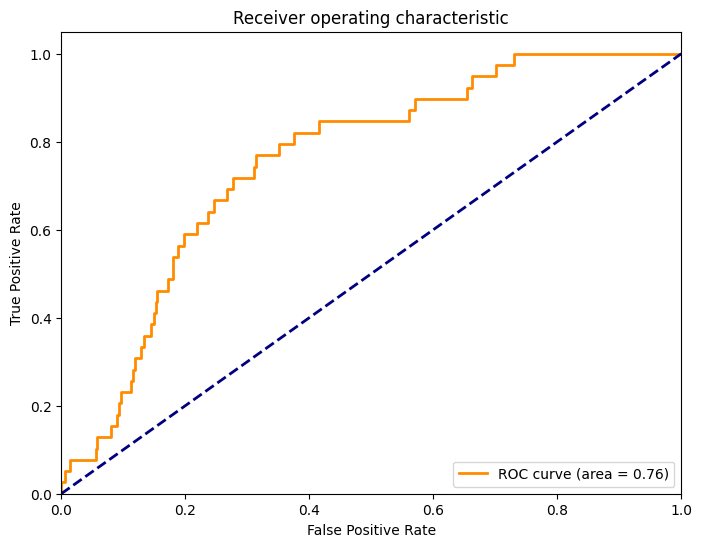

In [44]:
#Create XGBoost Classifier with best_params
xgb = XGBClassifier(**study.best_params)
xgb.fit(X_train, Y_train)
xgb_pred = xgb.predict(X_test)

print("Classification report for classifier :", classification_report(Y_test, xgb_pred))
print("Confusion matrix:\n" , confusion_matrix(Y_test, xgb_pred))
plot_roc_curve(Y_test, xgb.predict_proba(X_test)[::,1])


In [45]:
#Test the model on test data
test_pred = xgb.predict(test)

#Put the predictions in a dataframe
test_pred = pd.DataFrame(test_pred)

In [46]:
#Print the predictions
print(test_pred)

        0
0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
...   ...
1840  0.0
1841  0.0
1842  0.0
1843  0.0
1844  0.0

[1845 rows x 1 columns]


In [47]:
#Value counts of predictions
print(test_pred[0].value_counts())


0.0    1845
Name: 0, dtype: int64


c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_dep

[22:17:26] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Classification report for classifier :               precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      4719
         1.0       0.50      0.03      0.05        39

    accuracy                           0.99      4758
   macro avg       0.75      0.51      0.52      4758
weighted avg       0.99      0.99      0.99      4758

Confusion matrix:
 [[4718    1]
 [  38    1]]


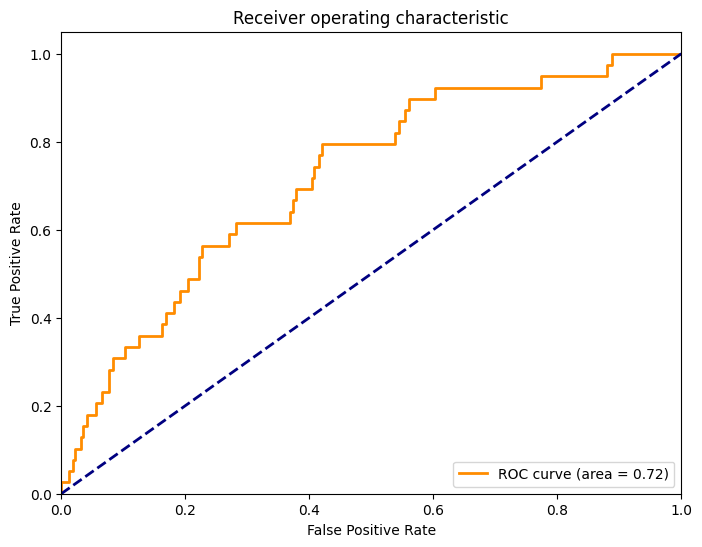

In [60]:
#Create Voting Classifier
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators=[('lr', log_reg), ('rf', rfc), ('xgb', xgb)], voting='soft')
voting_clf.fit(X_train, Y_train)
voting_pred = voting_clf.predict(X_test)

print("Classification report for classifier :", classification_report(Y_test, voting_pred))
print("Confusion matrix:\n" , confusion_matrix(Y_test, voting_pred))
plot_roc_curve(Y_test, voting_clf.predict_proba(X_test)[::,1])
